# Implementation of FIR Filter in the FPGA

In [75]:
import numpy as np
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter, firwin #fundamental to simulate a fir_filter in python

In [47]:
# Let us generate a wave function with two main frequencies, an high one and a low one:

data_size = 125
noise = 1 # the higher the noisier
file = open("../signal.txt", "w")

input_sig = []

for i in range(data_size):
    sig = 62*(np.sin(i/(2*np.pi))+ noise)
    noise = -noise
    input_sig.append(sig.astype(int)) # we write it as an int
    file.write(str(sig.astype(int)))
    file.write('\n')

file.close()

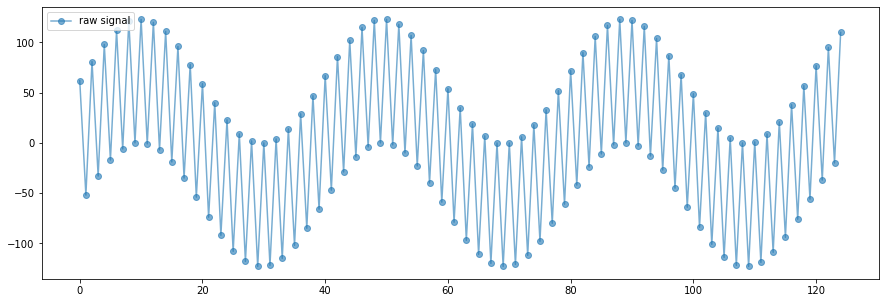

In [48]:
# Now we visualize it:
sig = np.loadtxt("../signal.txt", delimiter='\n')
t = np.arange(len(input_sig)) # array for the x coordinate, just for displaying

plt.figure(figsize=(15, 5))

plt.plot(t, sig, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [29]:
# After being computed on the actual FPGA

In [49]:
# I just copied from the terminal, had some problems in reading from a file :/
fpga = [0,0,0,0,0,6,2,3,5,8,10,11,13,14,15,15,15,14,14,12,11,9,7,5,3,0,-2,-5,-7,-9,-11,-13,-14,-15,-16,-16,-16,-15,-14,-13,-11,-10,-7,-5,-3,0,2,4,7,9,10,12,13,14,15,15,15,14,13,12,10,8,6,4,1,-1,-4,-6,-8,-10,-12,-13,-15,-15,-16,-16,-16,-15,-14,-12,-10,-9,-6,-4,-2,1,3,6,8,10,11,13,14,15,15,15,14,14,12,11,9,7,5,2,0,-2,-5,-7,-9,-11,-13,-14,-15,-16,-16,-16,-15,-14,-13,-11,-10,-7,-5,-3,0]
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**10/2**8)*fpga[i]

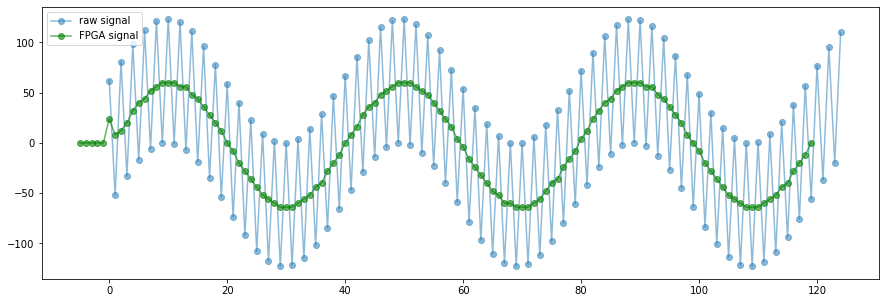

In [53]:
plt.figure(figsize=(15, 5))

t = np.arange(len(input_sig))
plt.plot(t, input_sig, '-o',alpha=.5,label='raw signal')
t = np.arange(len(fpga))
plt.plot(t-5, fpga, '-o', color='g',alpha=.6,label='FPGA signal')

#plt.title("")
#plt.xlim(0,200) #just for the latex report
plt.legend(loc="upper left")

In [2]:
def sine_wave(A, time, f): # creates a sine wave
    return A * np.sin(2 * np.pi * f * time)

In [71]:
data_size = 100

max_amplitude = 127
noise = 40
A1, A2 = max_amplitude - noise, noise
f1, f2, f3 = 1, 20, 100

t = np.linspace(0, 100, data_size)

signal = sine_wave(A1, t, f1) + sine_wave(A2, t, f2)

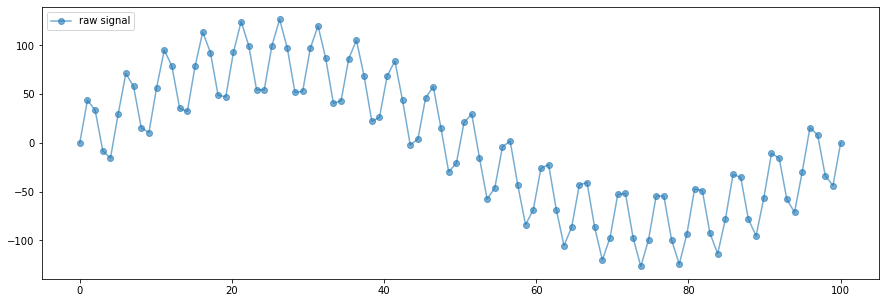

In [72]:
plt.figure(figsize=(15, 5))

plt.plot(t, signal, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

In [73]:
np.savetxt('../signal.txt', signal, delimiter='\n', fmt='%d')

In [81]:
numtaps = 4
f = 1

# this function gives us the coefficients used in the testbench
c = signal.firwin(numtaps, f, fs=10)
print("Coefficients for the Fir Filter:", c)


Coefficients for the Fir Filter: [0.04156529 0.45843471 0.45843471 0.04156529]


In [82]:
coeffpot = 9
rc = c * 2**coeffpot
print(rc)
trunc_rc = np.round(rc,0).astype(int)
bin_rc = []
hex_rc = []

for i in range(numtaps):
    bin_rc.append(bin(trunc_rc[i]))
    hex_rc.append(hex(trunc_rc[i]))
    
print(bin_rc)
print(hex_rc)

[ 21.28142691 234.71857309 234.71857309  21.28142691]
['0b10101', '0b11101011', '0b11101011', '0b10101']
['0x15', '0xeb', '0xeb', '0x15']


In [58]:
# After being computed on the actual FPGA

In [60]:
fpga = [0,0,0,0,0,0,4,7,3,-1,3,10,13,9,6,10,17,19,15,11,15,22,23,18,15,19,25,26,20,17,20,26,26,20,16,20,25,24,17,13,17,21,20,12,9,12,16,14,6,3,6,10,7,-1,-4,0,3,0,-8,-11,-7,-4,-7,-15,-17,-13,-10,-13,-21,-22,-18,-14,-18,-25,-26,-21,-17,-21,-27,-27,-21,-18,-21,-27,-26,-20,-16,-19,-24,-23,-16,-12,-16,-20,-18,-11,-7,-10,-14,-11]
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**10/2**8)*fpga[i]

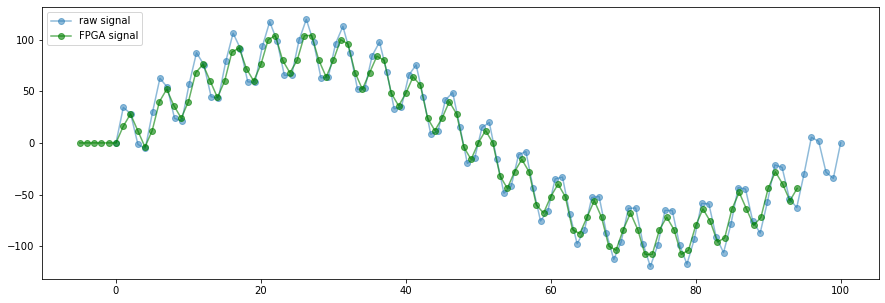

In [62]:
plt.figure(figsize=(15, 5))

plt.plot(t, signal, '-o',alpha=.5,label='raw signal')
t = np.arange(len(fpga))
plt.plot(t-5, fpga, '-o', color='g',alpha=.6,label='FPGA signal')

#plt.title("")
#plt.xlim(0,200) #just for the latex report
plt.legend(loc="upper left")